In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import figure

In [235]:
df= pd.read_csv('Data/train.csv')

In [236]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Looking at the correlation between the features to filter most effective features 

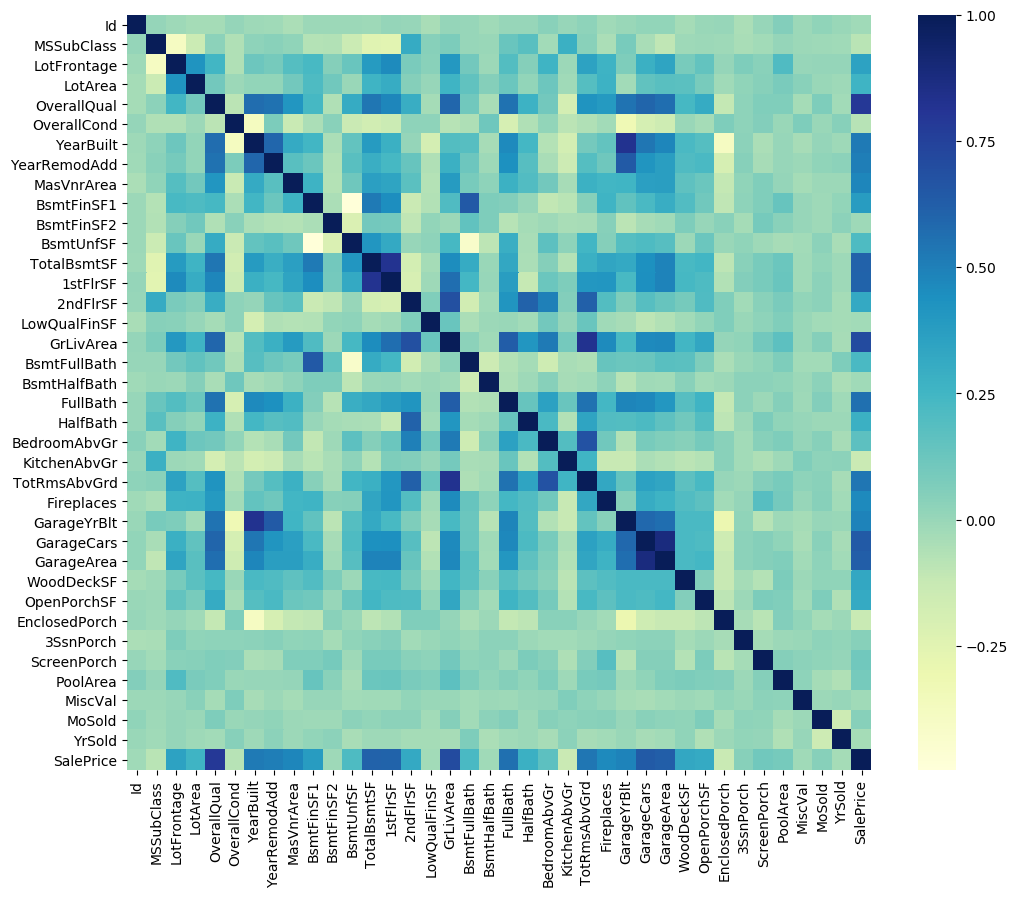

In [184]:
corr= df.corr()
figure(figsize= (12,10), dpi= 100)
sns.heatmap(corr, cmap= 'YlGnBu')

In [185]:
X_Feature_List= ['LotFrontage','LotArea','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch']

In [186]:
X_Features= pd.DataFrame(df, columns=X_Feature_List)

In [187]:
X_Features.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,3,1,8,0,2003.0,2,548,0,61,0
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,3,1,6,1,1976.0,2,460,298,0,0
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,3,1,6,1,2001.0,2,608,0,42,0
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,3,1,7,1,1998.0,3,642,0,35,272
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,4,1,9,1,2000.0,3,836,192,84,0


In [188]:
X_Features.dtypes

LotFrontage      float64
LotArea            int64
OverallQual        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
dtype: object

In [189]:
print(X_Features.describe())

       LotFrontage        LotArea  OverallQual    YearBuilt  YearRemodAdd  \
count  1201.000000    1460.000000  1460.000000  1460.000000   1460.000000   
mean     70.049958   10516.828082     6.099315  1971.267808   1984.865753   
std      24.284752    9981.264932     1.382997    30.202904     20.645407   
min      21.000000    1300.000000     1.000000  1872.000000   1950.000000   
25%      59.000000    7553.500000     5.000000  1954.000000   1967.000000   
50%      69.000000    9478.500000     6.000000  1973.000000   1994.000000   
75%      80.000000   11601.500000     7.000000  2000.000000   2004.000000   
max     313.000000  215245.000000    10.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    103.685262   443.639726   567.240411  1057.429452  1162.626712  ...   
std     181.066207   456.098091   441.866955   438.705324   386.58773

## Dealing with missing values.

In [190]:
import math
print(X_Features[X_Feature_List].isnull().sum() > 0)

LotFrontage       True
LotArea          False
OverallQual      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
GrLivArea        False
BsmtFullBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt       True
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
dtype: bool


In [191]:
isnullCol= ['LotFrontage','MasVnrArea','GarageYrBlt']
print(X_Features[isnullCol].count())
print('\n')
print(X_Features[isnullCol].isnull().sum())

LotFrontage    1201
MasVnrArea     1452
GarageYrBlt    1379
dtype: int64


LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


## The missing values for this dataset are Missing At Random Type. So taking mean of the feature column and filling in missing values

In [192]:
X_Features['LotFrontage']= X_Features.fillna(X_Features['LotFrontage'].mean())

In [193]:
print(X_Features[isnullCol].isnull().sum())

LotFrontage     0
MasVnrArea      8
GarageYrBlt    81
dtype: int64


In [194]:
X_Features['MasVnrArea']= X_Features.fillna(X_Features['MasVnrArea'].mean())

In [195]:
X_Features['GarageYrBlt']= X_Features.fillna(X_Features['GarageYrBlt'].mean())

In [196]:
print(X_Features[isnullCol].isnull().sum())

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64


In [197]:
print(X_Features.describe())

       LotFrontage        LotArea  OverallQual    YearBuilt  YearRemodAdd  \
count  1460.000000    1460.000000  1460.000000  1460.000000   1460.000000   
mean     70.049958   10516.828082     6.099315  1971.267808   1984.865753   
std      22.024023    9981.264932     1.382997    30.202904     20.645407   
min      21.000000    1300.000000     1.000000  1872.000000   1950.000000   
25%      60.000000    7553.500000     5.000000  1954.000000   1967.000000   
50%      70.049958    9478.500000     6.000000  1973.000000   1994.000000   
75%      79.000000   11601.500000     7.000000  2000.000000   2004.000000   
max     313.000000  215245.000000    10.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean     70.049958   443.639726   567.240411  1057.429452  1162.626712  ...   
std      22.024023   456.098091   441.866955   438.705324   386.58773

## Filtering out on the important features using Lasso Model 

In [198]:
from sklearn.linear_model import LassoCV

y= df['SalePrice']
reg = LassoCV()
reg.fit(X_Features, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_Features,y))
coef = pd.Series(reg.coef_, index = X_Features.columns)

Best alpha using built-in LassoCV: 209067.774683
Best score using built-in LassoCV: 0.717059


C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [199]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 15 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

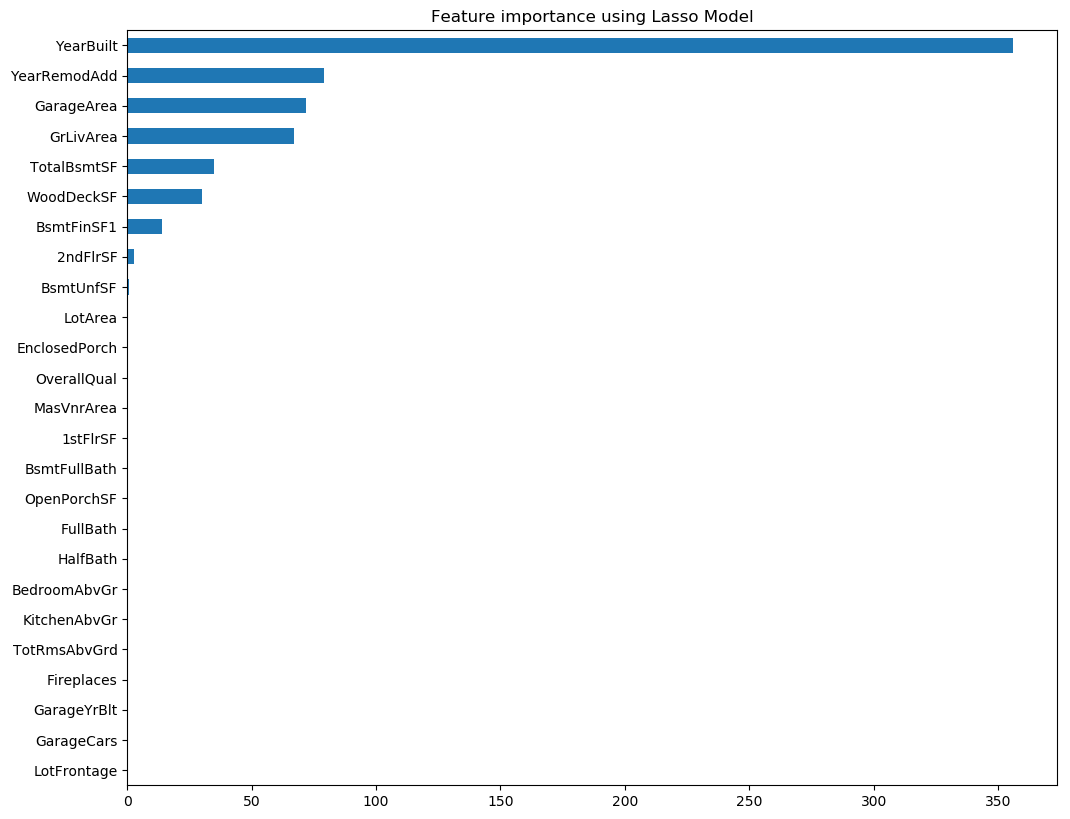

In [200]:
imp_coef = coef.sort_values()
figure(figsize= (12,10), dpi= 100)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [201]:
selected_features= ['YearBuilt','YearRemodAdd','GarageArea','GrLivArea','TotalBsmtSF','WoodDeckSF','BsmtFinSF1','2ndFlrSF','BsmtUnfSF','LotArea']

In [202]:
X_Features= X_Features[selected_features]

In [203]:
X_Features.columns

Index(['YearBuilt', 'YearRemodAdd', 'GarageArea', 'GrLivArea', 'TotalBsmtSF',
       'WoodDeckSF', 'BsmtFinSF1', '2ndFlrSF', 'BsmtUnfSF', 'LotArea'],
      dtype='object')

Lasso model helped with feature selection. Checking if any feature engineering is needed

In [204]:
X_Features.dtypes

YearBuilt       int64
YearRemodAdd    int64
GarageArea      int64
GrLivArea       int64
TotalBsmtSF     int64
WoodDeckSF      int64
BsmtFinSF1      int64
2ndFlrSF        int64
BsmtUnfSF       int64
LotArea         int64
dtype: object

All features are integers so don't see any scope for feature engineering

Creating a simple Linear Regression model for baseline purposes

In [205]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X_Features, y, random_state= 20, test_size= 0.4)

In [206]:
from sklearn.linear_model import LinearRegression

model= LinearRegression().fit(x_train, y_train)
yHat= model.predict(x_test)

In [207]:
def rmsle(y_pred, y_test) : 
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

In [208]:
print('RMSLE:', rmsle(yHat, y_test))

RMSLE: 0.19814869040976843


So the baseline RMSLE is 0.19814. Now using a RandomForestRegressor model

In [209]:
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor(n_estimators= 300, max_depth= 10).fit(x_train, y_train)

In [210]:
yHat= rfr.predict(x_test)
print('RMSLE:', rmsle(yHat, y_test))

RMSLE: 0.16715779474186032


In [211]:
test_df= pd.read_csv('Data/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [212]:
test= test_df[selected_features]
test.head()

,YearBuilt,YearRemodAdd,GarageArea,GrLivArea,TotalBsmtSF,WoodDeckSF,BsmtFinSF1,2ndFlrSF,BsmtUnfSF,LotArea
0,1961,1961,730.0,896,882.0,140,468.0,0,270.0,11622
1,1958,1958,312.0,1329,1329.0,393,923.0,0,406.0,14267
2,1997,1998,482.0,1629,928.0,212,791.0,701,137.0,13830
3,1998,1998,470.0,1604,926.0,360,602.0,678,324.0,9978
4,1992,1992,506.0,1280,1280.0,0,263.0,0,1017.0,5005


In [213]:
print(test.isnull().sum() > 0)

YearBuilt       False
YearRemodAdd    False
GarageArea       True
GrLivArea       False
TotalBsmtSF      True
WoodDeckSF      False
BsmtFinSF1       True
2ndFlrSF        False
BsmtUnfSF        True
LotArea         False
dtype: bool


In [214]:
isnullCol= ['GarageArea','TotalBsmtSF','BsmtFinSF1','BsmtUnfSF']
print(test[isnullCol].count())
print('\n')
print(test[isnullCol].isnull().sum())

GarageArea     1458
TotalBsmtSF    1458
BsmtFinSF1     1458
BsmtUnfSF      1458
dtype: int64


GarageArea     1
TotalBsmtSF    1
BsmtFinSF1     1
BsmtUnfSF      1
dtype: int64


In [215]:
for i in range(len(isnullCol)):
    test[isnullCol[i]]=test.fillna(test[isnullCol[i]].mean())

C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [216]:
print(test[isnullCol].count())
print('\n')
print(test[isnullCol].isnull().sum())

GarageArea     1459
TotalBsmtSF    1459
BsmtFinSF1     1459
BsmtUnfSF      1459
dtype: int64


GarageArea     0
TotalBsmtSF    0
BsmtFinSF1     0
BsmtUnfSF      0
dtype: int64


In [217]:
x= test[selected_features]

In [218]:
y= rfr.predict(x)

In [219]:
submit= pd.DataFrame(test_df, columns= ['Id'])

In [220]:
submit['SalePrice']= y

In [221]:
submit.head()

,Id,SalePrice
0,1461,190815.599983
1,1462,212637.503917
2,1463,335602.415669
3,1464,322505.257472
4,1465,270526.102148


In [222]:
submit.to_csv('submission.csv')

The RMSLE got ranked low. Starting over with feature selection and this time using all the available features

In [223]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [330]:
sel= list()

In [331]:
for name in df.columns :
    if df[name].dtypes == 'O':
        sel.append(name)

In [332]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
train_Df= pd.DataFrame(df)
for name in sel :
    train_Df[name]= lb.fit_transform(train_Df[name].astype('str'))

In [333]:
sel= list()
for name in train_Df.columns:
    if train_Df[name].isnull().sum()> 0:
        sel.append(name)

In [334]:
for i in range(len(sel)):
    train_Df[sel[i]]=train_Df.fillna(train_Df[sel[i]].mean())

In [335]:
y= train_Df['SalePrice']
x= train_Df.drop('SalePrice', axis= 1)
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 209067.774683
Best score using built-in LassoCV: 0.717365


C:\Users\rgangurde\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [336]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 16 variables and eliminated the other 64 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

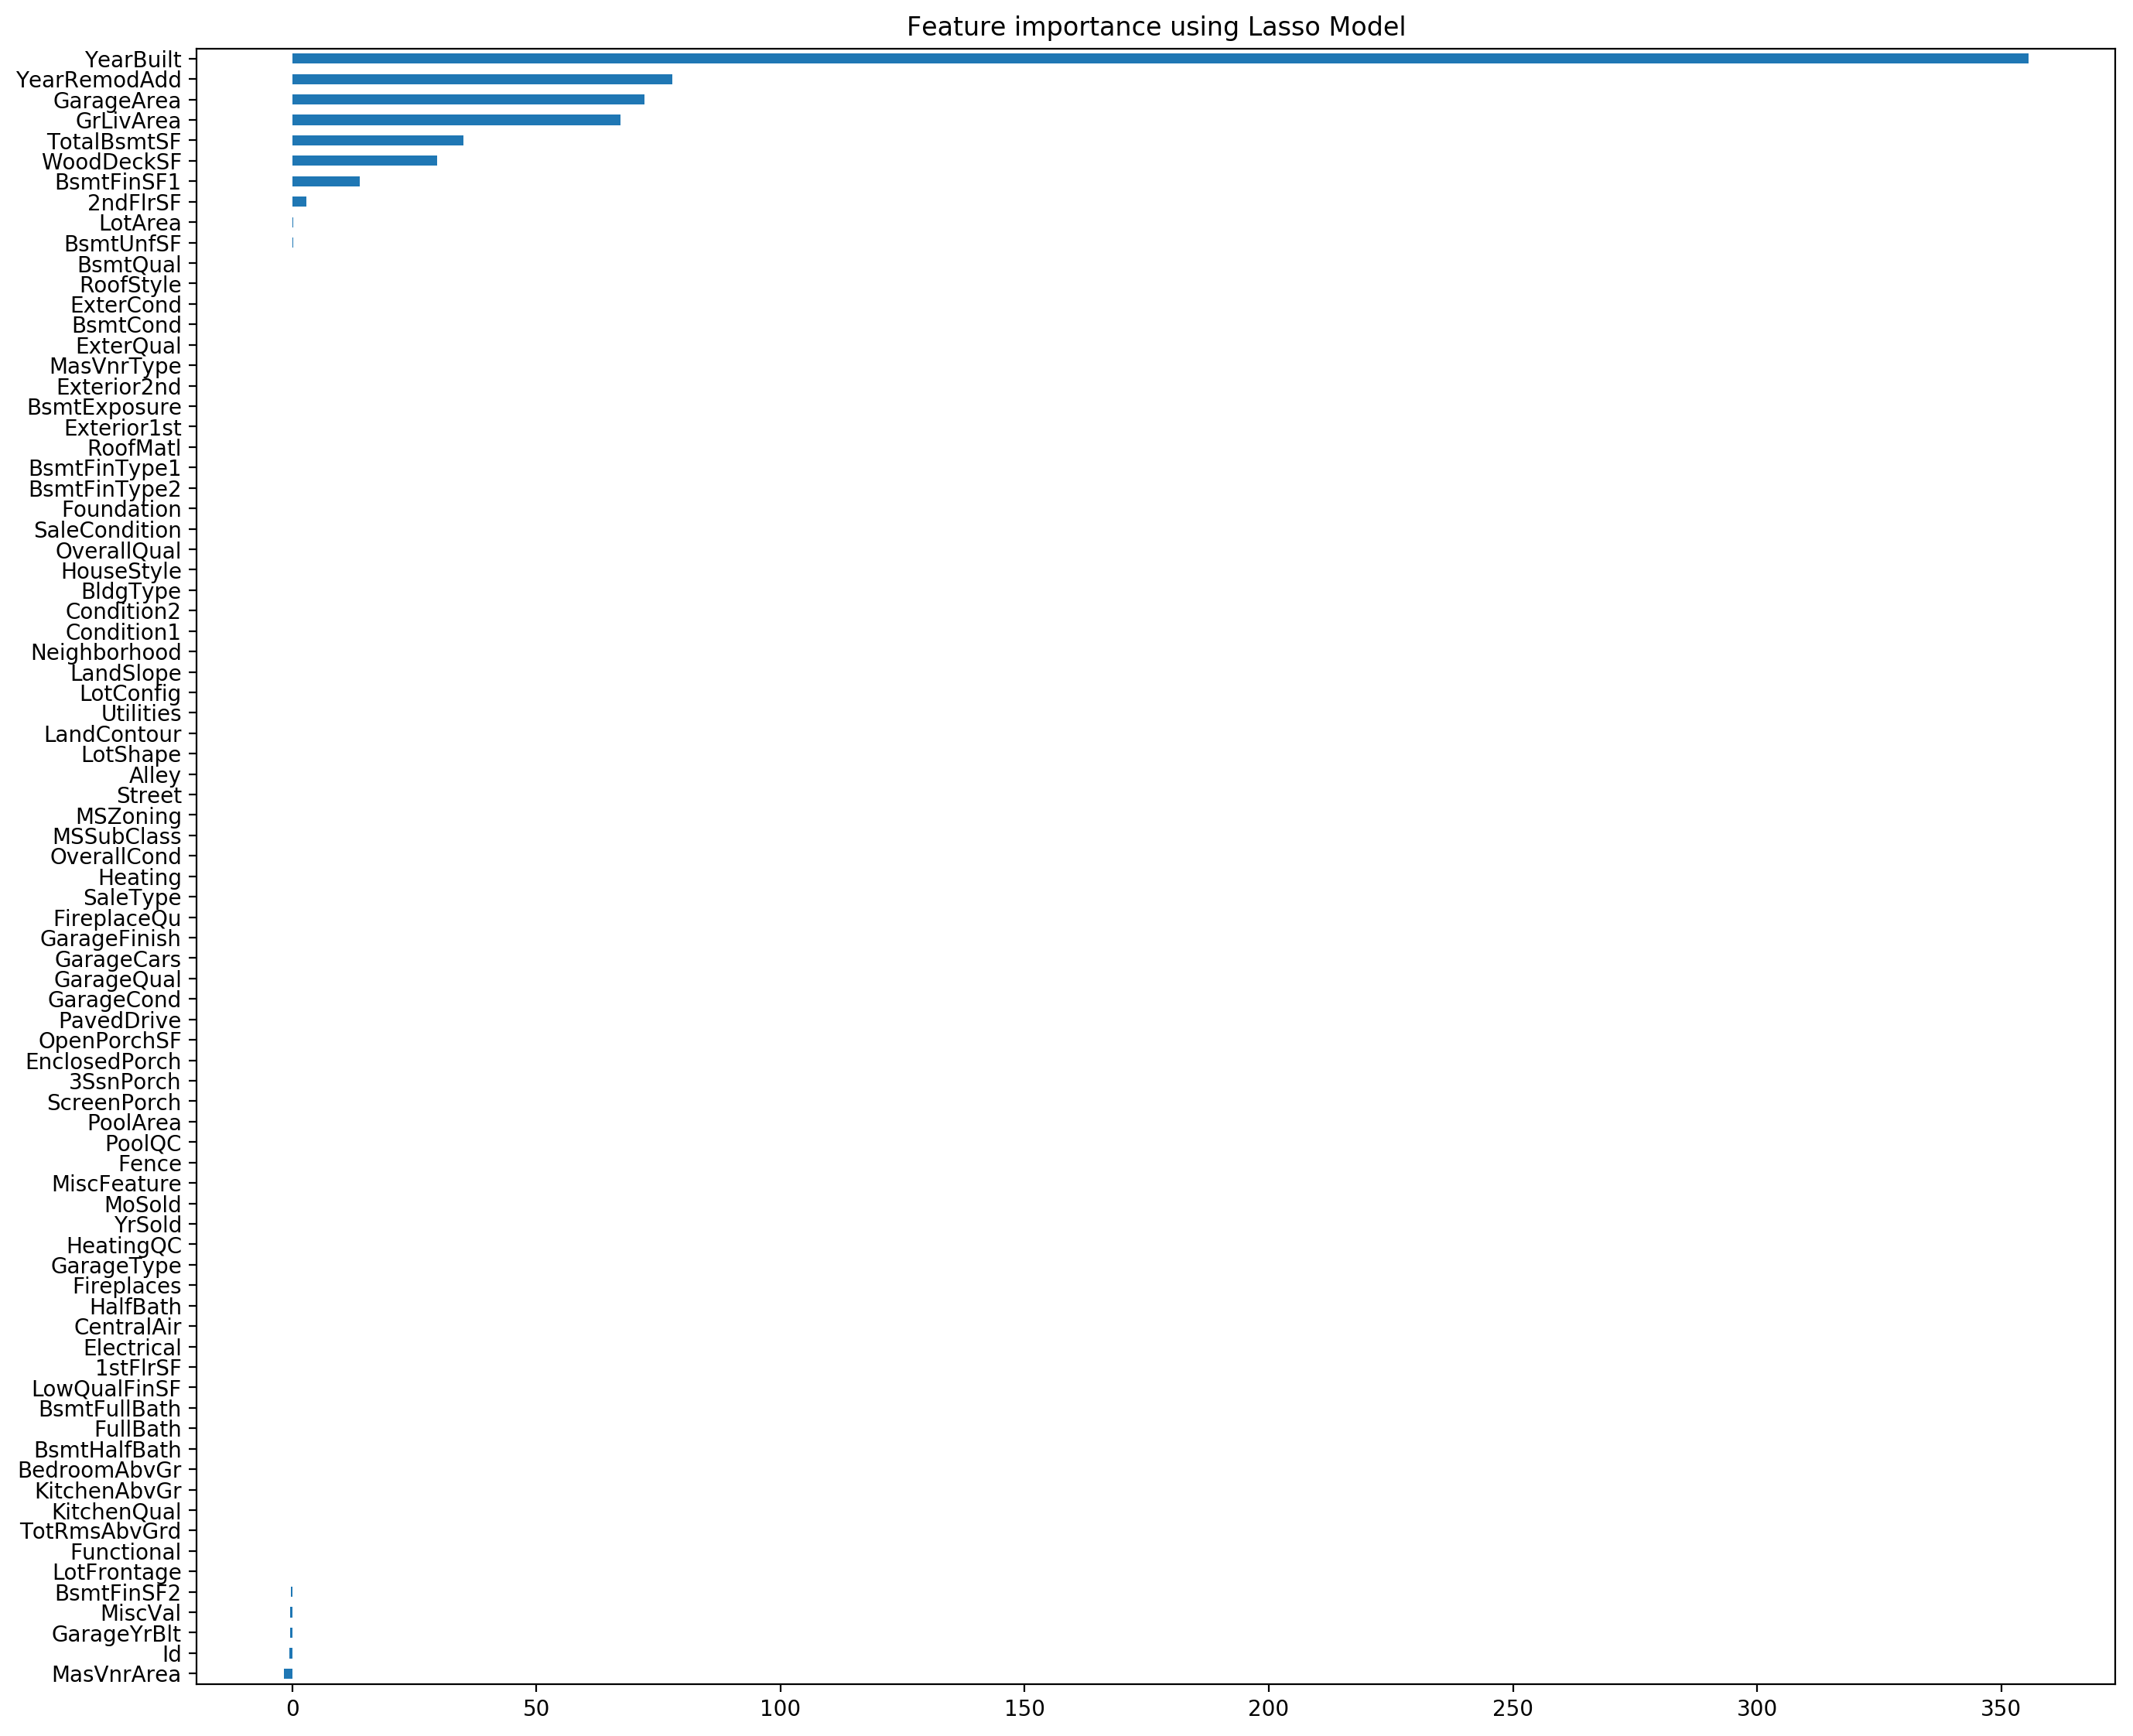

In [337]:
imp_coef = coef.sort_values()
figure(figsize= (16,14), dpi= 200)
# sns.barplot(x= imp_coef, y= imp_coef, hue= 'class', data= imp_coef)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [356]:
sel_coef= coef > 0.5
coef > 0

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea           True
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt         True
YearRemodAdd      True
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu      False
GarageType       False
GarageYrBlt      False
GarageFinish     False
GarageCars       False
GarageArea 

In [357]:
col = df.columns

In [358]:
sel= list()
for i in range(len(sel_coef)):
    if sel_coef[i] > 0.0:
        sel.append(col[i])

In [359]:
len(sel)

8

### I have 16 features which affect SalePrice the most. I have a dataset free of null values. Now, I'll filter my dataset and run a rfr model

In [360]:
train_Df= train_Df[sel]

In [361]:
x_train, x_test, y_train, y_test= train_test_split(train_Df, y, test_size= 0.4, random_state= 20)
rfr= RandomForestRegressor(n_estimators= 200,
                          bootstrap= True,
                          n_jobs= 5)
rfr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=5,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [365]:
yHat= rfr.predict(x_test)
print('RMSLE:', rmsle(y_test, yHat))

RMSLE: 0.17042923389185788


In [366]:
model.fit(x_train, y_train)
yHat= model.predict(x_test)
print('RMSLE:', rmsle(y_test, yHat))

RMSLE: 0.2000355517409258
